In [1]:
import pandas as pd

df = pd.read_csv("Customer Flight Activity.csv")
df.head(3)

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0


## Data Preprocessing

In [2]:
# Creating a Date column from Year and Month
df["Date"] = pd.to_datetime(df[["Year", "Month"]].assign(DAY = 1))

In [3]:
# Checking for missing values
df.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Date                           0
dtype: int64

In [4]:
# Checking for duplicate rows
df.duplicated().sum()

np.int64(1922)

In [5]:
# Removing duplicate rows
df.drop_duplicates()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Date
0,100590,2018,6,12,15276,22914.0,0,0,2018-06-01
1,100590,2018,7,12,9168,13752.0,0,0,2018-07-01
2,100590,2018,5,4,6504,9756.0,0,0,2018-05-01
3,100590,2018,10,0,0,0.0,512,92,2018-10-01
4,100590,2018,2,0,0,0.0,0,0,2018-02-01
...,...,...,...,...,...,...,...,...,...
392931,999986,2018,4,0,0,0.0,0,0,2018-04-01
392932,999986,2018,5,0,0,0.0,0,0,2018-05-01
392933,999986,2018,6,0,0,0.0,0,0,2018-06-01
392934,999986,2018,9,0,0,0.0,0,0,2018-09-01


In [6]:
df.duplicated().sum()

np.int64(1922)

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
# Viewing Basic Statistics
df.describe()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Date
count,391014.000000,391014.000000,391014.000000,391014.000000,391014.000000,391014.000000,391014.000000,391014.000000,391014
mean,550376.476648,2017.514038,6.514971,1.301253,1950.983205,2037.136759,31.458137,5.663362,2017-12-21 13:51:07.808313344
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-01-01 00:00:00
25%,327498.000000,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-07-01 00:00:00
50%,551710.000000,2018.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018-01-01 00:00:00
75%,772152.000000,2018.000000,10.000000,2.000000,3040.000000,3060.000000,0.000000,0.000000,2018-07-01 00:00:00
max,999986.000000,2018.000000,12.000000,28.000000,67284.000000,100926.000000,876.000000,158.000000,2018-12-01 00:00:00
std,258621.151837,0.499804,3.445263,1.965387,3245.061634,3879.029192,126.945609,22.853705,NaN


## EDA (Exploratory Data Analysis)

### Total Points Accumulated vs.Redeemed

In [10]:
import matplotlib.pyplot as plt

# Total points accumulated and redeemed
total_accumulated = df["Points Accumulated"].sum()
total_redeemed = df["Points Redeemed"].sum()

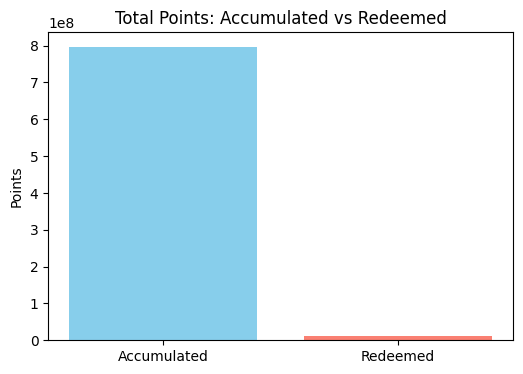

In [11]:
# Bar plot
plt.figure(figsize = (6,4))
plt.bar(["Accumulated", "Redeemed"], [total_accumulated, total_redeemed], color = ["skyblue", "salmon"])
plt.title("Total Points: Accumulated vs Redeemed")
plt.ylabel("Points")
plt.show()

### Points Behavior Over Time

In [12]:
# Group by Date
monthly_points = df.groupby("Date")[["Points Accumulated", "Points Redeemed"]].sum().reset_index()

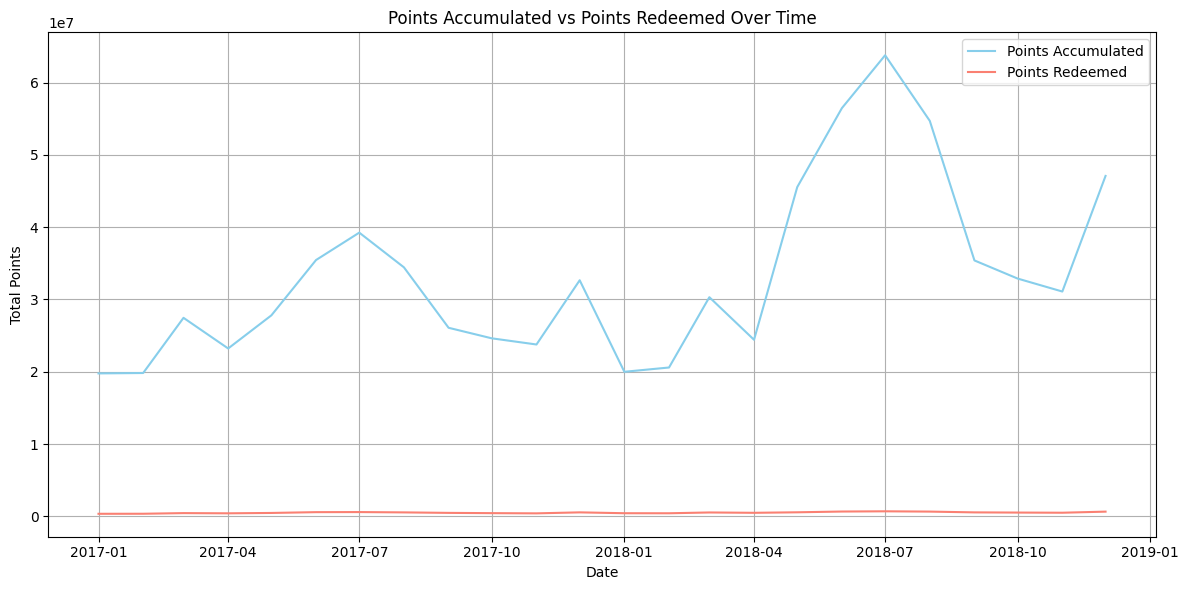

In [13]:
# Plot over time
plt.figure(figsize = (12, 6))
plt.plot(monthly_points["Date"], monthly_points["Points Accumulated"], label = "Points Accumulated", color = "skyblue")
plt.plot(monthly_points["Date"], monthly_points["Points Redeemed"], label = "Points Redeemed", color = "salmon")
plt.title("Points Accumulated vs Points Redeemed Over Time")
plt.xlabel("Date")
plt.ylabel("Total Points")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Group by Loyalty Number to get total points and flights per customer
customer_totals = df.groupby('Loyalty Number')[['Points Accumulated', 'Total Flights']].sum().reset_index()

# Top 10 customers by Points Accumulated
top_by_points = customer_totals.sort_values(by='Points Accumulated', ascending=False).head(10)

# Top 10 customers by Total Flights
top_by_flights = customer_totals.sort_values(by='Total Flights', ascending=False).head(10)

# Display results
print("Top 10 Customers by Points Accumulated:")
print(top_by_points)

print("\nTop 10 Customers by Total Flights:")
print(top_by_flights)


Top 10 Customers by Points Accumulated:
       Loyalty Number  Points Accumulated  Total Flights
10987          689839            268287.0             90
14790          893866            252960.0             89
7453           500248            238120.5             91
613            133324            233815.5             93
6884           471015            232176.0             82
5289           385092            231432.0            102
1867           201273            225346.5             89
2028           208961            225282.0             87
8478           556492            224673.0             95
11412          712114            220048.5             83

Top 10 Customers by Total Flights:
       Loyalty Number  Points Accumulated  Total Flights
4393           336882            144936.0            106
13298          813455            205402.5            104
5289           385092            231432.0            102
16450          983416            205602.0            100
11780       

In [15]:
# Group by customer and sum points
customer_points = df.groupby("Loyalty Number")[["Points Accumulated", "Points Redeemed"]].sum().reset_index()

# Avoid division by zero
customer_points = customer_points[customer_points["Points Accumulated"] > 0]

# Calculate redemption ratio
customer_points["Redemption Ratio"] = customer_points["Points Redeemed"] / customer_points["Points Accumulated"]

# Sort top 10 by Redemption Ratio
top_redeemers = customer_points.sort_values(by = "Redemption Ratio", ascending = False).head(10)

print("Top 10 Customers by Redemption Ratio:")
print(top_redeemers)

Top 10 Customers by Redemption Ratio:
       Loyalty Number  Points Accumulated  Points Redeemed  Redemption Ratio
15797          949612               602.0              719          1.194352
2025           208668               513.0              542          1.056530
1049           157566              1333.0             1057          0.792948
11427          713067               773.0              486          0.628719
3962           314189              1134.0              706          0.622575
14530          879416               966.0              589          0.609731
11526          718454              1113.0              520          0.467206
4831           360732               917.0              376          0.410033
2350           226804              1363.0              552          0.404989
4722           354206              1035.0              395          0.381643


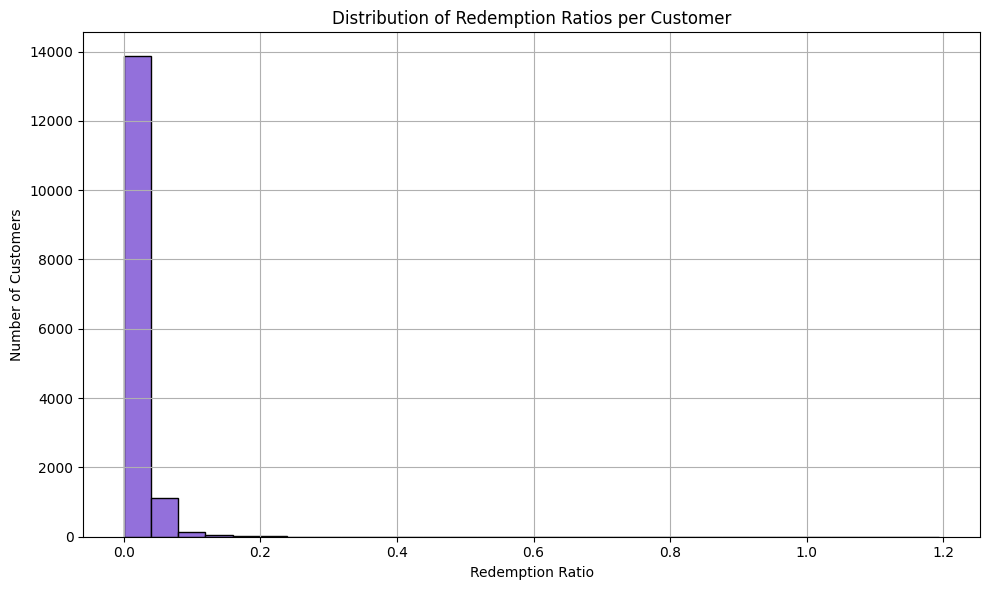

In [16]:
plt.figure(figsize = (10, 6))
plt.hist(customer_points["Redemption Ratio"], bins = 30, color = "mediumpurple", edgecolor = "black")
plt.title("Distribution of Redemption Ratios per Customer")
plt.xlabel("Redemption Ratio")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.tight_layout()
plt.show()

## Customer Value Metrics

## Prepare RFM data

In [17]:
# Setting a reference date for "today"
reference_date = df["Date"].max() + pd.Timedelta(days = 1)

#Group by customer
rfm = df.groupby("Loyalty Number").agg({"Date": lambda x: (reference_date - x.max()).days, "Total Flights": "sum", "Points Accumulated": "sum"}).reset_index()

# Rename columns
rfm.columns = ["Loyalty Number", "Recovery", "Frequency", "Monetary"]

In [18]:
rfm.head()

,Loyalty Number,Recovery,Frequency,Monetary
0,100018,1,46,81190.0
1,100102,1,51,68918.0
2,100140,1,47,72856.0
3,100214,1,22,38236.0
4,100272,1,37,54997.0


In [19]:
# Rename "Recovery" to "Recency"
rfm.rename(columns={'Recovery': 'Recency'}, inplace=True)

In [20]:
rfm.head()

,Loyalty Number,Recency,Frequency,Monetary
0,100018,1,46,81190.0
1,100102,1,51,68918.0
2,100140,1,47,72856.0
3,100214,1,22,38236.0
4,100272,1,37,54997.0


### Score RFM values (1 to 5 scale)

In [21]:
# Recency score (lower recency = more recent = higher score)
rfm["R_Score"] = pd.cut(rfm["Recency"].rank(method = "first"), bins = 5, labels = [5, 4, 3, 2, 1]).astype(int)

# Frequency score (more flights = higher score)
rfm["F_Score"] = pd.cut(rfm["Frequency"].rank(method = "first"), bins = 5, labels = [1, 2, 3, 4, 5]).astype(int)

# Monetary score (more points = higher score)
rfm["M_Score"] = pd.cut(rfm["Monetary"].rank(method = "first"), bins = 5, labels = [1, 2, 3, 4, 5]).astype(int)

# Combine into one RFM Score
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)

In [22]:
rfm.head()

,Loyalty Number,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,100018,1,46,81190.0,5,5,5,555
1,100102,1,51,68918.0,5,5,5,555
2,100140,1,47,72856.0,5,5,5,555
3,100214,1,22,38236.0,5,2,2,522
4,100272,1,37,54997.0,5,3,3,533


### Segmenting Customers Based on RFM Score

In [23]:
# Defining function to map RFM Score to segments
def segment_customer(score):
    if score == "555":
        return "Champion"
    elif score[0] == "5":
        return "Loyal"
    elif score[1] == "5":
        return "Frequent Flyer"
    elif score[2] == "5":
        return "High Spender"
    elif score in ["311", "211", "111"]:
        return "At Risk"
    else:
        return "Other"

In [24]:
# Applying segmentation
rfm["Segment"] = rfm["RFM_Score"].apply(segment_customer)

In [25]:
# Show segment distribution
rfm["Segment"].value_counts()

Segment
Other             8127
Loyal             2847
Frequent Flyer    2690
At Risk           1937
High Spender       635
Champion           501
Name: count, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_8248\2968207206.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(data = rfm, x = "Segment", order = rfm["Segment"].value_counts().index, palette= "Set2")


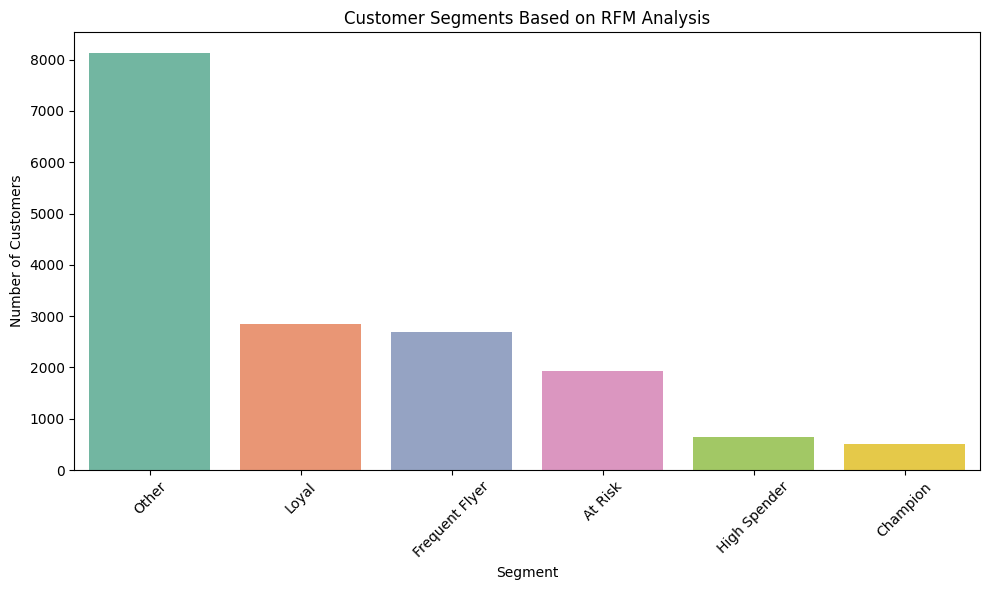

In [26]:
import seaborn as sn

plt.figure(figsize=(10, 6))
sn.countplot(data = rfm, x = "Segment", order = rfm["Segment"].value_counts().index, palette= "Set2")
plt.title("Customer Segments Based on RFM Analysis")
plt.ylabel("Number of Customers")
plt.xlabel("Segment")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Calculating CLV

### Calculating Average points per Flight + CLV

In [27]:
# Calculating average points per flight per customer
rfm["Avg_Points_Per_Flight"] = rfm["Monetary"] / rfm["Frequency"]

# Calculating CLV
rfm["CLV"] = rfm["Avg_Points_Per_Flight"] * rfm["Frequency"]

rfm[["Loyalty Number", "Frequency", "Monetary", "Avg_Points_Per_Flight", "CLV"]].head()

,Loyalty Number,Frequency,Monetary,Avg_Points_Per_Flight,CLV
0,100018,46,81190.0,1765.000000,81190.0
1,100102,51,68918.0,1351.333333,68918.0
2,100140,47,72856.0,1550.127660,72856.0
3,100214,22,38236.0,1738.000000,38236.0
4,100272,37,54997.0,1486.405405,54997.0


In [28]:
# Defining function again
def segment_customer(score):
    if score == "555":
        return "Champion"
    elif score[0] == "5":
        return "Loyal"
    elif score[1] == "5":
        return "Frequent Flyer"
    elif score[2] == "5":
        return "High Spender"
    elif score in ["311", "211", "111"]:
        return "At Risk"
    else:
        return "Other"
        
# Reapply it
rfm["Segment"] = rfm["RFM_Score"].apply(segment_customer)

In [29]:
top_clv = rfm.sort_values(by = "CLV", ascending = False).loc[:, ["Loyalty Number", "CLV", "Segment"]]
top_clv.head(10)

,Loyalty Number,CLV,Segment
10987,689839,268287.0,Frequent Flyer
14790,893866,252960.0,Frequent Flyer
7453,500248,238120.5,Frequent Flyer
613,133324,233815.5,Champion
6884,471015,232176.0,Frequent Flyer
5289,385092,231432.0,Frequent Flyer
1867,201273,225346.5,Champion
2028,208961,225282.0,Champion
8478,556492,224673.0,Frequent Flyer
11412,712114,220048.5,Frequent Flyer


C:\Users\USER\AppData\Local\Temp\ipykernel_8248\1610420523.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.barplot(data = rfm, x = "Segment", y = "CLV", estimator = "mean", ci = None, palette = "viridis")
C:\Users\USER\AppData\Local\Temp\ipykernel_8248\1610420523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data = rfm, x = "Segment", y = "CLV", estimator = "mean", ci = None, palette = "viridis")


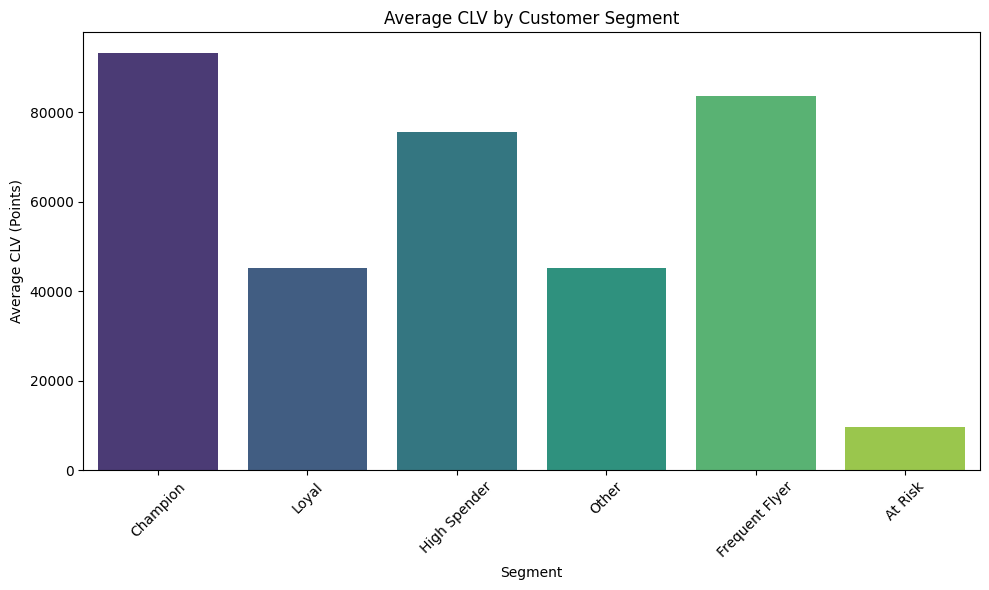

In [30]:
# Average CLV by Segment
plt.figure(figsize = (10, 6))
sn.barplot(data = rfm, x = "Segment", y = "CLV", estimator = "mean", ci = None, palette = "viridis")
plt.title("Average CLV by Customer Segment")
plt.ylabel("Average CLV (Points)")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## Predicting Customer Lifetime Value (CLV) with Regression

### Preparing Data for Modeling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Features and target
X = rfm[["Frequency", "Monetary", "R_Score", "F_Score", "M_Score"]]
y = rfm["CLV"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [32]:
rfm["CLV"].isnull().sum()

np.int64(1570)

In [33]:
# Dropping rows where CLV is NaN
rfm = rfm.dropna(subset = ["CLV"])

In [34]:
X = rfm[["Frequency", "Monetary", "R_Score", "F_Score", "M_Score"]]
y = rfm["CLV"]

In [38]:
print(rfm["CLV"].isnull().sum())

0


In [39]:
rfm = rfm.dropna(subset = ["CLV"]).reset_index(drop = True)

In [40]:
X = rfm[["Frequency", "Monetary", "R_Score", "F_Score", "M_Score"]]
y = rfm["CLV"]

In [41]:
print(y.isnull().sum())

0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [43]:
# Initializing and training model
model = LinearRegression()
model.fit(X_train, y_train)

#Predicting on test set
y_pred = model.predict(X_test)

#Evaluating the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"$R^2$ Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

$R^2$ Score: 1.0000
Mean Squared Error: 0.00


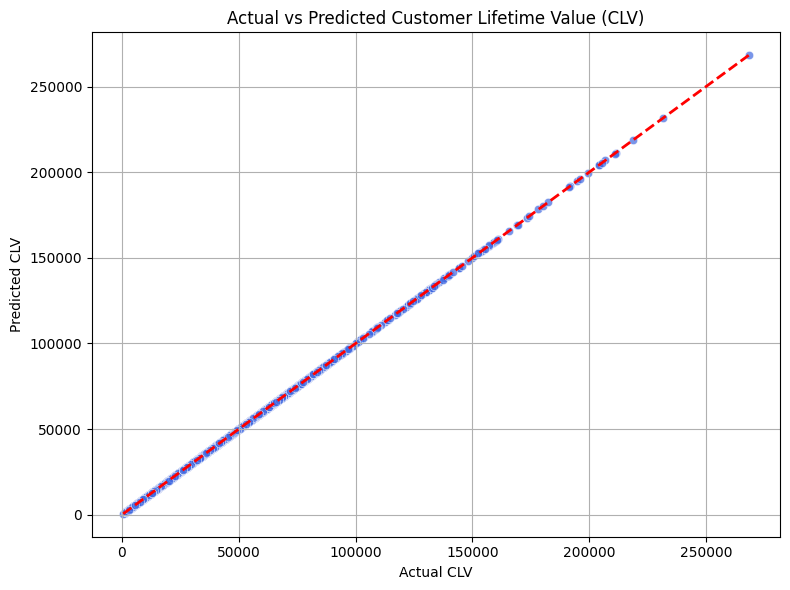

In [45]:
# Creating a scatter plot
plt.figure(figsize = (8,6))
sn.scatterplot(x = y_test, y = y_pred, color = "royalblue", alpha = 0.7)

# Plot the perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = "red", lw = 2, linestyle = "--")

#Labels and title
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("Actual vs Predicted Customer Lifetime Value (CLV)")
plt.grid(True)
plt.tight_layout()

plt.show()

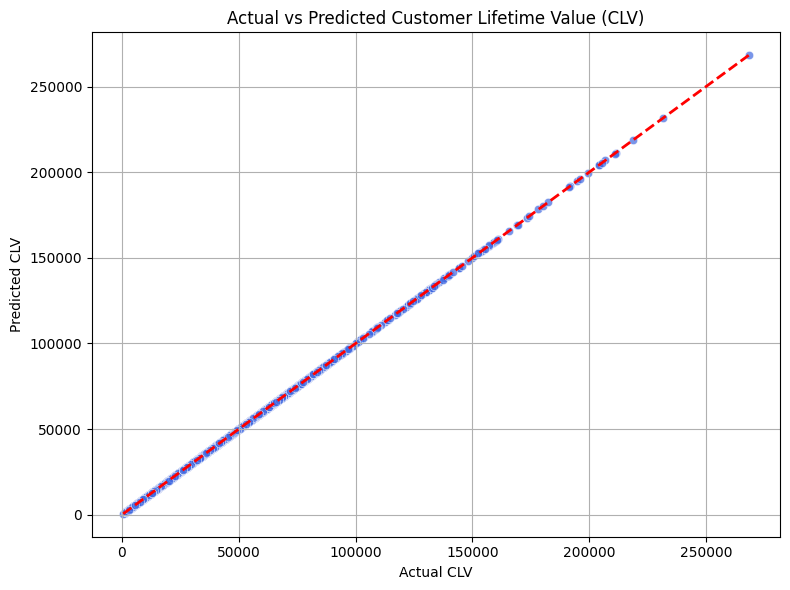

In [46]:
# Creating a scatter plot
plt.figure(figsize = (8,6))
sn.scatterplot(x = y_test, y = y_pred, color = "royalblue", alpha = 0.7)

# Plot the perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = "red", lw = 2, linestyle = "--")

#Labels and title
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("Actual vs Predicted Customer Lifetime Value (CLV)")
plt.grid(True)
plt.tight_layout()

# Save as PNG
plt.savefig("actual_vs_predicted_clv.png", dpi = 300)

# Show plot
plt.show()

In [48]:
# Save the final RFM dataset to a CSV file
rfm.to_csv("rfm_clv_segments.csv", index = False)